In [1]:
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt

import pandas as pd
from sodapy import Socrata
from config import CHI_API_Key
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", app_token = CHI_API_Key)
# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")
# First 2000 results, returned as JSON from API / converted to Python list ofS
# dictionaries by sodapy.
results = client.get("85ca-t3if", limit= 2000)
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [2]:
results_df

,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,...,intersection_related_i,hit_and_run_i,statements_taken_i,crash_date_est_i,photos_taken_i,dooring_i,private_property_i,work_zone_i,work_zone_type,workers_present_i
0,e191290f940ae419b40a2a884a7a8c2a85474072d722bd...,2020-11-13T02:09:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b211dc64e79486b269f97cd83721ef04148d6a0ef336e0...,2020-11-12T23:42:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16a8d879208f5b155a57ede7ce3ed45412e4d622d9d898...,2020-11-12T23:34:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73cac99302c4698da945e22b91054d0a7ad301d21c9419...,2020-11-12T23:22:00.000,25,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,ONE-WAY,STRAIGHT AND LEVEL,...,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5a04dd50cffc2c79fd9485164ae04f8b1a11cf81447912...,2020-11-12T23:00:00.000,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,d37c1411d7e197f549a50b67d0b1215791ff8f1166abca...,2020-11-03T18:00:00.000,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,PARKING LOT,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
1996,e8a40ef028889f1a7150843f882cf432856683d9a38461...,2020-11-03T18:00:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,df3b258df41e284778391bb64909a0e7972a6cbcd70c2b...,2020-11-03T17:48:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,340e19f70d40017c936504a2d246e5528d606b645e718e...,2020-11-03T17:40:00.000,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,OTHER,STRAIGHT AND LEVEL,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
results_df.columns

Index(['crash_record_id', 'crash_date', 'posted_speed_limit',
       'traffic_control_device', 'device_condition', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'report_type',
       'crash_type', 'damage', 'date_police_notified',
       'prim_contributory_cause', 'sec_contributory_cause', 'street_no',
       'street_direction', 'street_name', 'beat_of_occurrence', 'crash_hour',
       'crash_day_of_week', 'crash_month', 'latitude', 'longitude', 'location',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication',
       'injuries_unknown', 'intersection_related_i', 'hit_and_run_i',
       'statements_taken_i', 'crash_date_est_i', 'photos_taken_i', 'dooring_i',
       'private_property_i', 'work_zone_i', 'work_zone_type',
       'workers

In [4]:
results_df.dtypes

crash_record_id                  object
crash_date                       object
posted_speed_limit               object
traffic_control_device           object
device_condition                 object
weather_condition                object
lighting_condition               object
first_crash_type                 object
trafficway_type                  object
alignment                        object
roadway_surface_cond             object
road_defect                      object
report_type                      object
crash_type                       object
damage                           object
date_police_notified             object
prim_contributory_cause          object
sec_contributory_cause           object
street_no                        object
street_direction                 object
street_name                      object
beat_of_occurrence               object
crash_hour                       object
crash_day_of_week                object
crash_month                      object


In [5]:
# Create file with just id and lat/long

geo_df = pd.DataFrame(results_df[['crash_record_id', 'latitude','longitude', 'crash_month', 'crash_day_of_week', 'crash_hour', 'weather_condition', 'lighting_condition', 'damage', 'crash_type', 'injuries_total', 'posted_speed_limit', 'prim_contributory_cause']])
geo_df.head(10)

,crash_record_id,latitude,longitude,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,injuries_total,posted_speed_limit,prim_contributory_cause
0,e191290f940ae419b40a2a884a7a8c2a85474072d722bd...,42.021974905,-87.666969524,11,6,2,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,NaN,30,EXCEEDING SAFE SPEED FOR CONDITIONS
1,b211dc64e79486b269f97cd83721ef04148d6a0ef336e0...,41.778151035,-87.722600136,11,5,23,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,2,30,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE
2,16a8d879208f5b155a57ede7ce3ed45412e4d622d9d898...,41.885653668,-87.774688353,11,5,23,RAIN,"DARKNESS, LIGHTED ROAD","OVER $1,500",NO INJURY / DRIVE AWAY,0,30,FOLLOWING TOO CLOSELY
3,73cac99302c4698da945e22b91054d0a7ad301d21c9419...,41.913631723,-87.730258725,11,5,23,RAIN,"DARKNESS, LIGHTED ROAD","$501 - $1,500",INJURY AND / OR TOW DUE TO CRASH,0,25,UNABLE TO DETERMINE
4,5a04dd50cffc2c79fd9485164ae04f8b1a11cf81447912...,41.761112759,-87.64930616,11,5,23,RAIN,"DARKNESS, LIGHTED ROAD","$501 - $1,500",NO INJURY / DRIVE AWAY,0,30,UNABLE TO DETERMINE
5,5ffd58d488eeb1cff6cf464f6c1050153abe35d7cc8ef4...,41.946167066,-87.752348185,11,5,23,RAIN,"DARKNESS, LIGHTED ROAD","$501 - $1,500",NO INJURY / DRIVE AWAY,0,30,FOLLOWING TOO CLOSELY
6,6f9bb7801b4aea78baac6564489c8c887a696cfba35ad8...,41.878958459,-87.720828225,11,5,22,RAIN,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,3,30,FAILING TO YIELD RIGHT-OF-WAY
7,503793bc5d0f132fb8b4f93fc8185492041915724e83af...,41.763312406,-87.643128168,11,5,22,RAIN,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,0,20,DISREGARDING STOP SIGN
8,6ebefff2c480aebd3de2a8d8fd019dcc5db49389cdbc4d...,42.013914404,-87.686340735,11,5,22,RAIN,"DARKNESS, LIGHTED ROAD","$501 - $1,500",NO INJURY / DRIVE AWAY,0,30,UNABLE TO DETERMINE
9,769092b7a8e2d1dfc2ccaaef7ae7615d1802808bc5ae49...,41.948378703,-87.70527451,11,5,22,RAIN,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,0,15,NOT APPLICABLE


In [6]:
geo_df.describe()

,crash_record_id,latitude,longitude,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,injuries_total,posted_speed_limit,prim_contributory_cause
count,2000,1987,1987,2000,2000,2000,2000,2000,2000,2000,1995,2000,2000
unique,2000,1927,1927,1,7,24,6,6,3,2,6,13,35
top,cb2ffade354d68610c26c97414f03e698ca66c7d8d8a5b...,41.771330473,-87.724882975,11,4,15,CLEAR,DAYLIGHT,"OVER $1,500",NO INJURY / DRIVE AWAY,0,30,UNABLE TO DETERMINE
freq,1,3,3,2000,401,166,1854,1113,1309,1365,1701,1463,848


In [7]:
geo_df['latitude'].isnull().sum()

13

In [8]:
geo_df2 = geo_df[geo_df['latitude'].notna()]
geo_df2.describe()

,crash_record_id,latitude,longitude,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,injuries_total,posted_speed_limit,prim_contributory_cause
count,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1982,1987,1987
unique,1987,1927,1927,1,7,24,6,6,3,2,6,13,35
top,cb2ffade354d68610c26c97414f03e698ca66c7d8d8a5b...,41.771330473,-87.724882975,11,4,15,CLEAR,DAYLIGHT,"OVER $1,500",NO INJURY / DRIVE AWAY,0,30,UNABLE TO DETERMINE
freq,1,3,3,1987,396,165,1842,1106,1301,1356,1690,1459,846


In [9]:
group_df = geo_df2.groupby(["crash_hour",]).count()
group_df = group_df.sort_values(["crash_hour"], ascending=True)
group_df

,crash_record_id,latitude,longitude,crash_month,crash_day_of_week,weather_condition,lighting_condition,damage,crash_type,injuries_total,posted_speed_limit,prim_contributory_cause
crash_hour,,,,,,,,,,,,
0,36,36,36,36,36,36,36,36,36,36,36,36
1,31,31,31,31,31,31,31,31,31,31,31,31
10,101,101,101,101,101,101,101,101,101,101,101,101
11,127,127,127,127,127,127,127,127,127,127,127,127
12,115,115,115,115,115,115,115,115,115,115,115,115
13,132,132,132,132,132,132,132,132,132,132,132,132
14,121,121,121,121,121,121,121,121,121,121,121,121
15,165,165,165,165,165,165,165,165,165,165,165,165
16,145,145,145,145,145,145,145,145,145,145,145,145


In [10]:
geo_df2.dtypes

crash_record_id            object
latitude                   object
longitude                  object
crash_month                object
crash_day_of_week          object
crash_hour                 object
weather_condition          object
lighting_condition         object
damage                     object
crash_type                 object
injuries_total             object
posted_speed_limit         object
prim_contributory_cause    object
dtype: object

In [11]:
geo_df2['weather_condition'].unique()

array(['CLEAR', 'RAIN', 'UNKNOWN', 'CLOUDY/OVERCAST', 'OTHER', 'SNOW'],
      dtype=object)

In [12]:
geo_df2['lighting_condition'].unique()

array(['DARKNESS, LIGHTED ROAD', 'DARKNESS', 'DAYLIGHT', 'DUSK', 'DAWN',
       'UNKNOWN'], dtype=object)

In [13]:
geo_df2['damage'].unique()

array(['OVER $1,500', '$501 - $1,500', '$500 OR LESS'], dtype=object)

In [14]:
geo_df2['crash_type'].unique()

array(['INJURY AND / OR TOW DUE TO CRASH', 'NO INJURY / DRIVE AWAY'],
      dtype=object)

In [15]:
geo_df2['injuries_total'].unique()

array([nan, '2', '0', '3', '1', '4', '7'], dtype=object)

In [16]:
geo_df2['posted_speed_limit'].unique()

array(['30', '25', '20', '15', '10', '35', '3', '40', '5', '45', '55',
       '26', '0'], dtype=object)

In [17]:
geo_df2['prim_contributory_cause'].unique()

array(['EXCEEDING SAFE SPEED FOR CONDITIONS',
       'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 'FOLLOWING TOO CLOSELY',
       'UNABLE TO DETERMINE', 'FAILING TO YIELD RIGHT-OF-WAY',
       'DISREGARDING STOP SIGN', 'NOT APPLICABLE',
       'IMPROPER TURNING/NO SIGNAL', 'IMPROPER BACKING',
       'IMPROPER OVERTAKING/PASSING',
       'FAILING TO REDUCE SPEED TO AVOID CRASH',
       'DISTRACTION - FROM OUTSIDE VEHICLE', 'IMPROPER LANE USAGE',
       'CELL PHONE USE OTHER THAN TEXTING',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'DISREGARDING TRAFFIC SIGNALS',
       'DISTRACTION - FROM INSIDE VEHICLE',
       'PHYSICAL CONDITION OF DRIVER',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'EQUIPMENT - VEHICLE CONDITION',
       'DISREGARDING OTHER TRAFFIC SIGNS',
       'ROAD CONSTRUCTION/MAINTENANCE', 'DRIVING ON WRONG SIDE/WRONG WAY',
  

In [18]:
geo_df3 =  pd.DataFrame(results_df[['crash_record_id', 'latitude','longitude', 'crash_month', 'crash_day_of_week', 'crash_hour', 'weather_condition', 'lighting_condition', 'damage', 'crash_type', 'injuries_total', 'posted_speed_limit']])
geo_df.head(10)

,crash_record_id,latitude,longitude,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,injuries_total,posted_speed_limit,prim_contributory_cause
0,e191290f940ae419b40a2a884a7a8c2a85474072d722bd...,42.021974905,-87.666969524,11,6,2,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,NaN,30,EXCEEDING SAFE SPEED FOR CONDITIONS
1,b211dc64e79486b269f97cd83721ef04148d6a0ef336e0...,41.778151035,-87.722600136,11,5,23,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,2,30,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE
2,16a8d879208f5b155a57ede7ce3ed45412e4d622d9d898...,41.885653668,-87.774688353,11,5,23,RAIN,"DARKNESS, LIGHTED ROAD","OVER $1,500",NO INJURY / DRIVE AWAY,0,30,FOLLOWING TOO CLOSELY
3,73cac99302c4698da945e22b91054d0a7ad301d21c9419...,41.913631723,-87.730258725,11,5,23,RAIN,"DARKNESS, LIGHTED ROAD","$501 - $1,500",INJURY AND / OR TOW DUE TO CRASH,0,25,UNABLE TO DETERMINE
4,5a04dd50cffc2c79fd9485164ae04f8b1a11cf81447912...,41.761112759,-87.64930616,11,5,23,RAIN,"DARKNESS, LIGHTED ROAD","$501 - $1,500",NO INJURY / DRIVE AWAY,0,30,UNABLE TO DETERMINE
5,5ffd58d488eeb1cff6cf464f6c1050153abe35d7cc8ef4...,41.946167066,-87.752348185,11,5,23,RAIN,"DARKNESS, LIGHTED ROAD","$501 - $1,500",NO INJURY / DRIVE AWAY,0,30,FOLLOWING TOO CLOSELY
6,6f9bb7801b4aea78baac6564489c8c887a696cfba35ad8...,41.878958459,-87.720828225,11,5,22,RAIN,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,3,30,FAILING TO YIELD RIGHT-OF-WAY
7,503793bc5d0f132fb8b4f93fc8185492041915724e83af...,41.763312406,-87.643128168,11,5,22,RAIN,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,0,20,DISREGARDING STOP SIGN
8,6ebefff2c480aebd3de2a8d8fd019dcc5db49389cdbc4d...,42.013914404,-87.686340735,11,5,22,RAIN,"DARKNESS, LIGHTED ROAD","$501 - $1,500",NO INJURY / DRIVE AWAY,0,30,UNABLE TO DETERMINE
9,769092b7a8e2d1dfc2ccaaef7ae7615d1802808bc5ae49...,41.948378703,-87.70527451,11,5,22,RAIN,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,0,15,NOT APPLICABLE


In [19]:
geo_df3['crash_type'] = geo_df3['crash_type'].replace(['INJURY AND / OR TOW DUE TO CRASH'],1)
geo_df3['crash_type'] = geo_df3['crash_type'].replace(['NO INJURY / DRIVE AWAY'],2)
geo_df3['damage'] = geo_df3['damage'].replace(['OVER $1,500'],1)
geo_df3['damage'] = geo_df3['damage'].replace(['$501 - $1,500'],2)
geo_df3['damage'] = geo_df3['damage'].replace(['$500 OR LESS'],3)
geo_df3['lighting_condition'] = geo_df3['lighting_condition'].replace(['DAYLIGHT'],1)
geo_df3['lighting_condition'] = geo_df3['lighting_condition'].replace(['LIGHTED ROAD'],2)
geo_df3['lighting_condition'] = geo_df3['lighting_condition'].replace(['DARKNESS, LIGHTED ROAD'],3)
geo_df3['lighting_condition'] = geo_df3['lighting_condition'].replace(['DUSK'],4)
geo_df3['lighting_condition'] = geo_df3['lighting_condition'].replace(['DAWN'],5)
geo_df3['lighting_condition'] = geo_df3['lighting_condition'].replace(['UNKNOWN'],6)
geo_df3['lighting_condition'] = geo_df3['lighting_condition'].replace(['DARKNESS'],7)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['CLEAR'],1)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['RAIN'],2)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['UNKNOWN'],3)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['CLOUDY/OVERCAST'],4)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['OTHER'],5)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['UNKNOWN'],6)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['SNOW'],7)
geo_df3

,crash_record_id,latitude,longitude,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,injuries_total,posted_speed_limit
0,e191290f940ae419b40a2a884a7a8c2a85474072d722bd...,42.021974905,-87.666969524,11,6,2,1,3,1,1,NaN,30
1,b211dc64e79486b269f97cd83721ef04148d6a0ef336e0...,41.778151035,-87.722600136,11,5,23,1,3,1,1,2,30
2,16a8d879208f5b155a57ede7ce3ed45412e4d622d9d898...,41.885653668,-87.774688353,11,5,23,2,3,1,2,0,30
3,73cac99302c4698da945e22b91054d0a7ad301d21c9419...,41.913631723,-87.730258725,11,5,23,2,3,2,1,0,25
4,5a04dd50cffc2c79fd9485164ae04f8b1a11cf81447912...,41.761112759,-87.64930616,11,5,23,2,3,2,2,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,d37c1411d7e197f549a50b67d0b1215791ff8f1166abca...,41.922182525,-87.69539385,11,3,18,1,1,1,2,0,10
1996,e8a40ef028889f1a7150843f882cf432856683d9a38461...,41.865752299,-87.761792881,11,3,18,1,3,1,2,0,30
1997,df3b258df41e284778391bb64909a0e7972a6cbcd70c2b...,41.9024425,-87.733879652,11,3,17,1,3,1,2,0,30
1998,340e19f70d40017c936504a2d246e5528d606b645e718e...,41.941850434,-87.654226407,11,3,17,1,4,2,1,1,30


In [20]:
geo_df3.dtypes

crash_record_id       object
latitude              object
longitude             object
crash_month           object
crash_day_of_week     object
crash_hour            object
weather_condition      int64
lighting_condition     int64
damage                 int64
crash_type             int64
injuries_total        object
posted_speed_limit    object
dtype: object

In [21]:
geo_df3["crash_hour"] = geo_df3["crash_hour"].astype(int)
geo_df3["crash_day_of_week"] = geo_df3["crash_day_of_week"].astype(int)
geo_df3["crash_month"] = geo_df3["crash_month"].astype(int)
geo_df3["posted_speed_limit"] = geo_df3["posted_speed_limit"].astype(int)

In [22]:
geo_df3.corr()

,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,posted_speed_limit
crash_month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crash_day_of_week,NaN,1.000000,0.045370,-0.071591,-0.023089,0.015707,0.025811,0.018809
crash_hour,NaN,0.045370,1.000000,0.022153,0.259411,0.016055,0.004235,-0.004572
weather_condition,NaN,-0.071591,0.022153,1.000000,0.166491,-0.005104,0.044186,-0.037388
lighting_condition,NaN,-0.023089,0.259411,0.166491,1.000000,-0.044575,-0.044806,0.012825
damage,NaN,0.015707,0.016055,-0.005104,-0.044575,1.000000,0.208390,-0.037215
crash_type,NaN,0.025811,0.004235,0.044186,-0.044806,0.208390,1.000000,-0.137411
posted_speed_limit,NaN,0.018809,-0.004572,-0.037388,0.012825,-0.037215,-0.137411,1.000000


In [23]:
geo_df3.dtypes

crash_record_id       object
latitude              object
longitude             object
crash_month            int32
crash_day_of_week      int32
crash_hour             int32
weather_condition      int64
lighting_condition     int64
damage                 int64
crash_type             int64
injuries_total        object
posted_speed_limit     int32
dtype: object

In [24]:
geo_df3 = geo_df3.applymap(str)
geo_df3.dtypes

crash_record_id       object
latitude              object
longitude             object
crash_month           object
crash_day_of_week     object
crash_hour            object
weather_condition     object
lighting_condition    object
damage                object
crash_type            object
injuries_total        object
posted_speed_limit    object
dtype: object

In [25]:
# Drop null coordinates
geo_df.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)

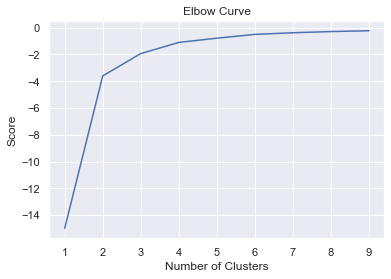

In [26]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = geo_df[['latitude']]
X_axis = geo_df[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [27]:
# Variable with the Longitude and Latitude
X=geo_df.loc[:,['crash_record_id','latitude','longitude']]
X.head(10)

,crash_record_id,latitude,longitude
0,e191290f940ae419b40a2a884a7a8c2a85474072d722bd...,42.021974905,-87.666969524
1,b211dc64e79486b269f97cd83721ef04148d6a0ef336e0...,41.778151035,-87.722600136
2,16a8d879208f5b155a57ede7ce3ed45412e4d622d9d898...,41.885653668,-87.774688353
3,73cac99302c4698da945e22b91054d0a7ad301d21c9419...,41.913631723,-87.730258725
4,5a04dd50cffc2c79fd9485164ae04f8b1a11cf81447912...,41.761112759,-87.64930616
5,5ffd58d488eeb1cff6cf464f6c1050153abe35d7cc8ef4...,41.946167066,-87.752348185
6,6f9bb7801b4aea78baac6564489c8c887a696cfba35ad8...,41.878958459,-87.720828225
7,503793bc5d0f132fb8b4f93fc8185492041915724e83af...,41.763312406,-87.643128168
8,6ebefff2c480aebd3de2a8d8fd019dcc5db49389cdbc4d...,42.013914404,-87.686340735
9,769092b7a8e2d1dfc2ccaaef7ae7615d1802808bc5ae49...,41.948378703,-87.70527451


In [28]:
kmeans = KMeans(n_clusters = 6, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,crash_record_id,latitude,longitude,cluster_label
0,e191290f940ae419b40a2a884a7a8c2a85474072d722bd...,42.021974905,-87.666969524,1
1,b211dc64e79486b269f97cd83721ef04148d6a0ef336e0...,41.778151035,-87.722600136,2
2,16a8d879208f5b155a57ede7ce3ed45412e4d622d9d898...,41.885653668,-87.774688353,4
3,73cac99302c4698da945e22b91054d0a7ad301d21c9419...,41.913631723,-87.730258725,4
4,5a04dd50cffc2c79fd9485164ae04f8b1a11cf81447912...,41.761112759,-87.64930616,0
5,5ffd58d488eeb1cff6cf464f6c1050153abe35d7cc8ef4...,41.946167066,-87.752348185,5
6,6f9bb7801b4aea78baac6564489c8c887a696cfba35ad8...,41.878958459,-87.720828225,4
7,503793bc5d0f132fb8b4f93fc8185492041915724e83af...,41.763312406,-87.643128168,0
8,6ebefff2c480aebd3de2a8d8fd019dcc5db49389cdbc4d...,42.013914404,-87.686340735,1
9,769092b7a8e2d1dfc2ccaaef7ae7615d1802808bc5ae49...,41.948378703,-87.70527451,1


In [29]:
#X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [30]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from sklearn import metrics
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

OSError: [WinError 126] The specified module could not be found

In [31]:
# define the number of kilometers in one radian
kms_per_radian = 6371.0088

In [32]:
# represent points consistently as (lat, lon)
coords = pd.DataFrame(geo_df[['latitude', 'longitude']])
coords.rename(columns={'latitude': 'lat', 'longitude': 'lon'}, inplace=True)
coords

,lat,lon
0,42.021974905,-87.666969524
1,41.778151035,-87.722600136
2,41.885653668,-87.774688353
3,41.913631723,-87.730258725
4,41.761112759,-87.64930616
...,...,...
1995,41.922182525,-87.69539385
1996,41.865752299,-87.761792881
1997,41.9024425,-87.733879652
1998,41.941850434,-87.654226407


In [33]:
# Need to change object type to float type for the calculations
coords["lat"] = pd.to_numeric(coords["lat"], downcast="float")
coords["lon"] = pd.to_numeric(coords["lon"], downcast="float")
coords.dtypes

lat    float32
lon    float32
dtype: object

In [34]:
# define epsilon as 1.5 kilometers, converted to radians for use by haversine
epsilon = 1.5 / kms_per_radian

In [35]:
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_

# get the number of clusters
num_clusters = len(set(cluster_labels))

# all done, print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(geo_df), num_clusters, 100*(1 - float(num_clusters) / len(geo_df)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))

Clustered 1,987 points down to 10 clusters, for 99.5% compression in 0.14 seconds
Silhouette coefficient: -0.173


In [36]:
coords.dtypes

lat    float32
lon    float32
dtype: object

In [37]:
# turn the clusters in to a pandas series, where each element is a cluster of points
clusters = pd.Series([coords[cluster_labels==n] for n in range(num_clusters)])
clusters.dtypes
clusters

0                lat        lon
0     42.021976 -87...
1              lat        lon
13  41.651703 -87.527...
2                lat        lon
37    41.751980 -87...
3                lat        lon
56    41.666725 -87...
4               lat        lon
265  41.684498 -87.5...
5                 lat      lon
419  41.953766 -87.9142
6               lat        lon
609  41.713062 -87.7...
7                lat        lon
764   41.979534 -87...
8                lat        lon
1238  41.690773 -87...
9                lat       lon
1485  41.980686 -87....
dtype: object

In [38]:
print(num_clusters)

10


In [39]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

centermost_points = clusters.apply(get_centermost_point)

NameError: name 'MultiPoint' is not defined

In [44]:
# centroid = (MultiPoint(clusters[2]).centroid.x, MultiPoint(clusters[2]).centroid.y)
# centermost_point = min(clusters, key=lambda point: great_circle(point, centroid).m)

In [45]:
# unzip the list of centermost points (lat, lon) tuples into separate lat and lon lists
lats, lons = zip(*centermost_points)

# from these lats/lons create a new df of one representative point for each cluster
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})
rep_points.tail()

NameError: name 'centermost_points' is not defined

NameError: name 'rs' is not defined

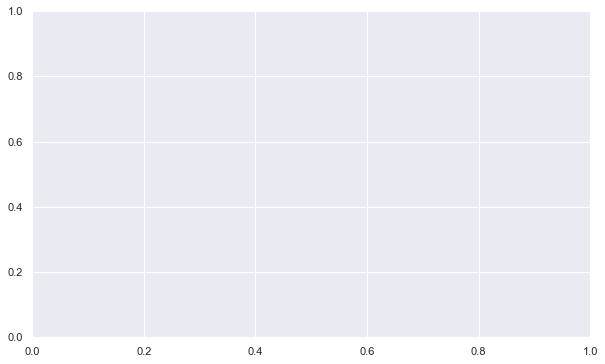

In [46]:
# plot the final reduced set of coordinate points vs the original full set
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['lon'], rs['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(geo_df['lon'], geo_df['lat'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([geo_df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()